# Importing and First Look

Install pandas and numpy

In [ ]:
!pip install pandas 
!pip install numpy 

Mount OneDrive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import pandas to use dataframes, seaborn and pyplot for graphics, sk learn packages for predictions.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Read in SRA from the data saved to OneDrive:

In [ ]:
df = pd.read_csv("drive/My Drive/Task_Data.csv",engine='python')

firm_ID dropped,as not needed for analysis:

In [ ]:
col_to_drop = ["firm_ID"]
df = df.drop(columns=col_to_drop,axis=1)

Printing the head of the dataframe 

In [ ]:
print(df.head)

<bound method NDFrame.head of      big_clients  num_offices  tax  ...  dispute  parking  disciplinary_action
0              0            4    0  ...        0        0                    0
1              0            3    1  ...        0        1                    0
2              0            3    0  ...        1        0                    0
3              0            3    1  ...        0        1                    0
4              0            2    0  ...        1        1                    0
..           ...          ...  ...  ...      ...      ...                  ...
245            0            5    0  ...        0        1                    0
246            0            2    0  ...        1        0                    0
247            1            4    0  ...        0        0                    0
248            0            3    1  ...        0        1                    0
249            0            4    0  ...        1        1                    1

[250 rows x 12 column

Listing column names:

In [ ]:
for col_name in df.columns: 
    print(col_name)

big_clients
num_offices
tax
overseas_offices
tcsp
turnover
conveyancing
numstaff
family
dispute
parking
disciplinary_action


Have several types of firms:
*   Big client firms
*   Specialist tax firms
*   Firms with overseas offices
*   Trusts and company service provider firms
*   Specialist conveyencer firms
*   Specialist family firms
*   Specialist dispute resolution firms
*   Firms with onsite parking 


# Dealing With Outliers

Can see that there are 11 null values in turnover and 6 in the numstaff column

In [ ]:
df.isna().sum()

big_clients             0
num_offices             0
tax                     0
overseas_offices        0
tcsp                    0
turnover               11
conveyancing            0
numstaff                6
family                  0
dispute                 0
parking                 0
disciplinary_action     0
dtype: int64

Boxplot to detect outliers for turnover:

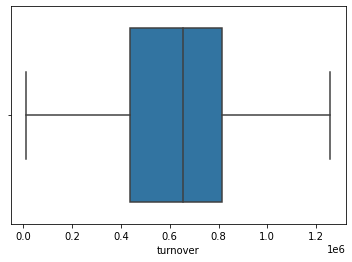

In [ ]:
sns.boxplot(x=df['turnover'])

No outliers so using mean imputation for null values on turnover column

In [ ]:
df['turnover'] = df['turnover'].fillna( df['turnover'].mean() )

Boxplot of numstaff:

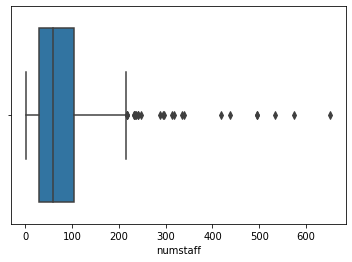

In [ ]:
sns.boxplot(x=df['numstaff'])

The number of staff here clearly varies with many outliers so using Median imputation:

In [ ]:
df['numstaff'] = df['numstaff'].fillna( df['numstaff'].mean() )

All outliers now removed:

In [ ]:
df.isna().sum()

big_clients            0
num_offices            0
tax                    0
overseas_offices       0
tcsp                   0
turnover               0
conveyancing           0
numstaff               0
family                 0
dispute                0
parking                0
disciplinary_action    0
dtype: int64

# Plots of Features and Disciplinary Action 

There are more firms that do not have big clients:

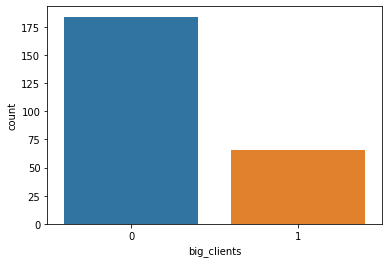

In [ ]:
sns.countplot(x='big_clients',data=df)

The majority of firms have 3 or 4 offices:

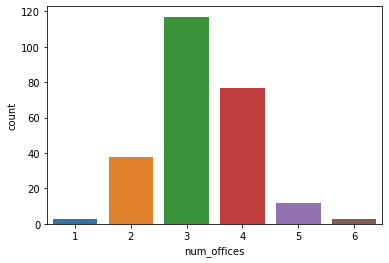

In [ ]:
sns.countplot(x='num_offices',data=df)

Most firms do not specialise in tax:

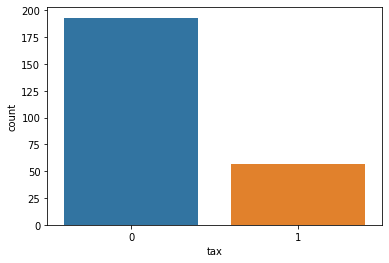

In [ ]:
sns.countplot(x='tax',data=df)

There are very few firms with overseas offices:

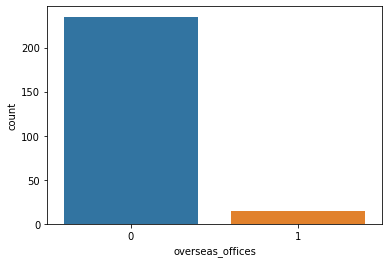

In [ ]:
sns.countplot(x='overseas_offices',data=df)

The majority of firms are trusts and company service providers:

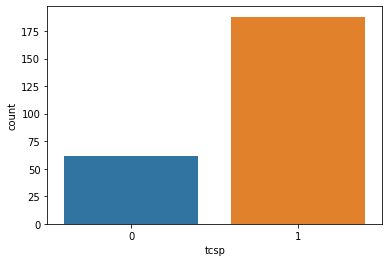

In [ ]:
sns.countplot(x='tcsp',data=df)

Most firms are specialist conveyancers:

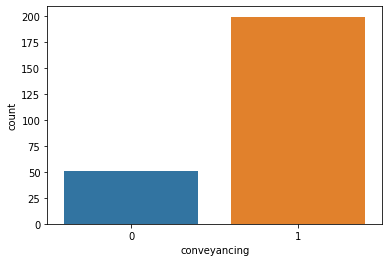

In [ ]:
sns.countplot(x='conveyancing',data=df)

Similar number of specialist family firms to those that are not:

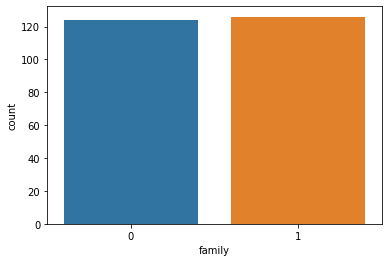

In [ ]:
sns.countplot(x='family',data=df)

Majority are not specialist dispute resolution firms:

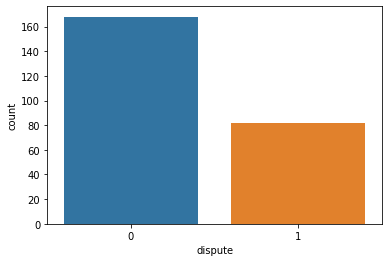

In [ ]:
sns.countplot(x='dispute',data=df)

More firms have onsite parking:

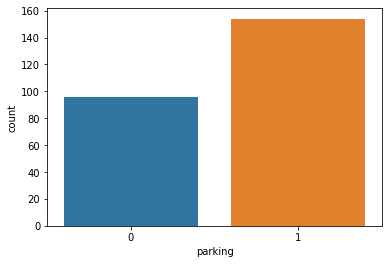

In [ ]:
sns.countplot(x='parking',data=df)

More firms have not had disciplinary action taken by the SRA:

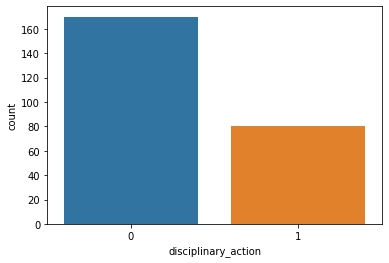

In [ ]:
sns.countplot(x='disciplinary_action',data=df)

# Examining Multicollinearity 

Heatmap to show multicollinearity:

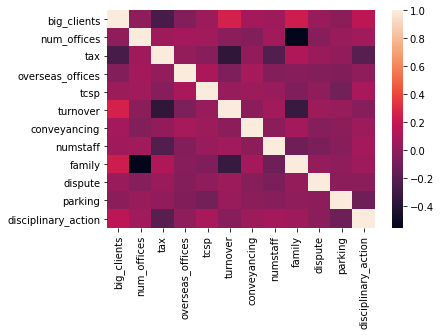

In [ ]:
%matplotlib inline
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Looking at feature relationships and note do not want multicollinearity in the logistic regression to be carried out. Associations of note:

*   Big clients related to turnover (positive correlation)
*   Big clients related to family (positive correlation)
*   family related to number of offices (negative correlation)
*   turnover related to tax (negative correlation)
*   turnover related to family (negative correlation)










Will look at this multicollinearity in more depth:

Can see that firms with a client that make up more than 20% of their income are usually specialist family law firms.

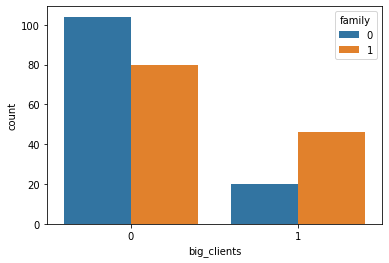

In [ ]:
sns.countplot(x='big_clients',hue='family',data=df)

The majority of the data here lies between 3 and 4 offices. Most firms have 3 offices. Family specialist firms generally have a lower number than those that are not specialists. 

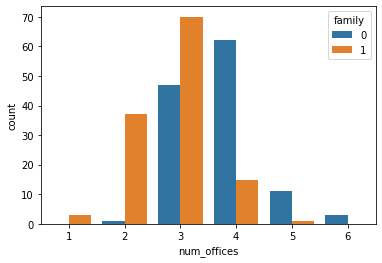

In [ ]:
sns.countplot(x='num_offices',hue='family',data=df)

Can see a large amount of crossover in the range of the two plots. Range for turnover varies less for big clients, and these big clients appear to see a higher turnover - which makes sense as they have big clients!

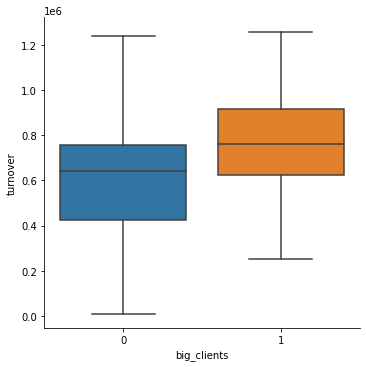

In [ ]:
sns.catplot(x="big_clients", y="turnover", kind="box", data=df)

Specialist family clients have a larger range in turnover and also a lower average turnover than those that do not specialise in the area. 

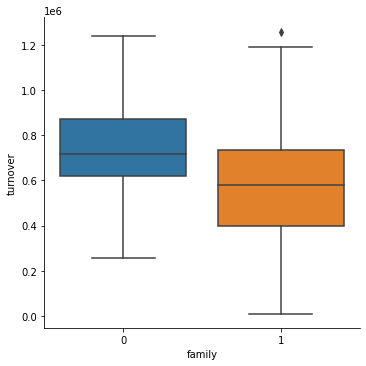

In [ ]:
sns.catplot(x="family", y="turnover", kind="box", data=df)

Specialist tax firms on average see a lower turnover than those that are not. 

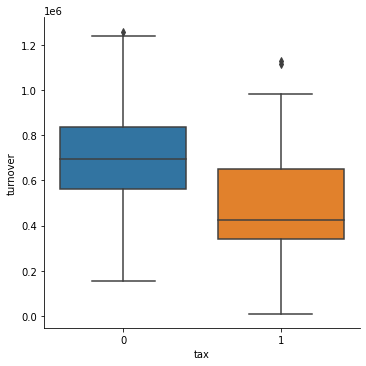

In [ ]:
sns.catplot(x="tax", y="turnover", kind="box", data=df)

Categorical variables have already kindly been flagged, therefore can use pearson's correlation coefficient to see which variables are related to disciplinary action:

In [ ]:
df[df.columns[:]].corr()['disciplinary_action'][:]

big_clients            0.172744
num_offices            0.068660
tax                   -0.188854
overseas_offices       0.007221
tcsp                   0.096104
turnover              -0.018543
conveyancing           0.049368
numstaff               0.074375
family                 0.063113
dispute               -0.004383
parking               -0.110722
disciplinary_action    1.000000
Name: disciplinary_action, dtype: float64

From the above we can see the features that are most related to disciplinary action:

*   Tax
*   Big_clients
*   Parking








Can see the association below:

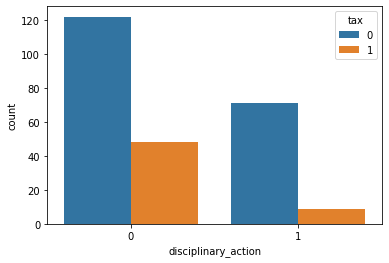

In [ ]:
sns.countplot(x='disciplinary_action',hue='tax',data=df)

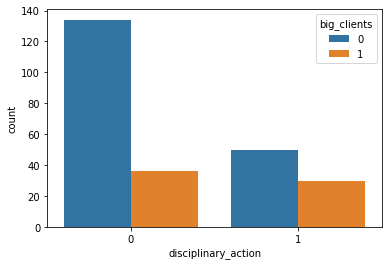

In [ ]:
sns.countplot(x='disciplinary_action',hue='big_clients',data=df)

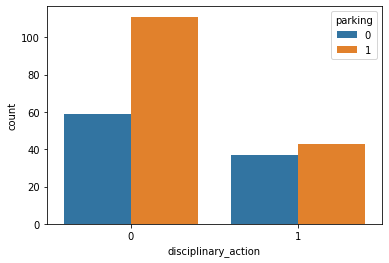

In [ ]:
sns.countplot(x='disciplinary_action',hue='parking',data=df)

# Logistic Regression 

Drop turnover and family columns as they are not related to disciplinary action and they create multicollinearity as both related to  big_clients:

In [ ]:
X = df.drop(['disciplinary_action','turnover','family'],axis=1)
y = df['disciplinary_action']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = model.predict(X_test)

Approximately a 75% accuracy

In [ ]:
accuracy_score(y_test,predictions)

0.7466666666666667

Can view the predictions here and see that for each of the values in the nine columns in this instance there will be a dispute. 

In [ ]:
y_pred1 = model.predict(X_test[:1])
print(X_test[:1])
print(y_pred1)

    big_clients  num_offices  tax  ...  numstaff  dispute  parking
67            1            3    0  ...      58.0        1        0

[1 rows x 9 columns]
[1]


# To improve the model

In order to improve the model:

*   Flag whether the firm has suddenly closed down or stopped helping the client suddenly
*   Flag whether the firm has taken or misused money of the client
*   Flag whether the firm has acted dishonestly towards the client

All of the above should have very strong positive correlations with disciplinary action and would be the most influential predictors.

